<a href="https://colab.research.google.com/github/piero0090/RepoData01/blob/master/DataAnalysis01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import RobustScaler

**Descripción de las variables**
* Edad: edad del paciente [años]
* Sexo: sexo del paciente [M: Hombre, F: Mujer]
* ChestPainType: tipo de dolor torácico [TA: Angina típica, ATA: Angina atípica, NAP: Dolor no anginoso, ASY: Asintomático]
* RestingBP: presión arterial en reposo [mm Hg]
* Colesterol: colesterol sérico [mm/dl].
* FastingBS: glucemia en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario]
* RestingECG: resultados del electrocardiograma en reposo [Normal: Normal, ST: con anomalía de la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV), HVI: con hipertrofia ventricular izquierda probable o definida según los criterios de Estes].
* FCmáx: frecuencia cardiaca máxima alcanzada [Valor numérico entre 60 y 202].
* Angina de esfuerzo: angina inducida por el ejercicio [S: sí, N: no].
* Oldpeak: oldpeak = ST [Valor numérico medido en depresión].
* ST_Slope: la pendiente del segmento ST máximo del ejercicio [Up: pendiente ascendente, Flat: plano, Down: pendiente descendente].
* HeartDisease: clase de salida [1: cardiopatía, 0: normal]


# **Análisis exploratorio de datos**

In [2]:
df = pd.read_csv('/content/heart(1).xls')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print('El dataset contiene',df.shape[0],'datos y',df.shape[1],'variables iniciales')

El dataset contiene 918 datos y 12 variables iniciales


In [4]:
print('Valores nulos')
df.isnull().sum()

Valores nulos


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

*Descripción general de las variables*

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


<ipython-input-6-6db8302e9c6d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot=True)


<Axes: title={'center': 'DIAGRAMA DE CORRELACIÓN DE LAS VARIABLES'}>

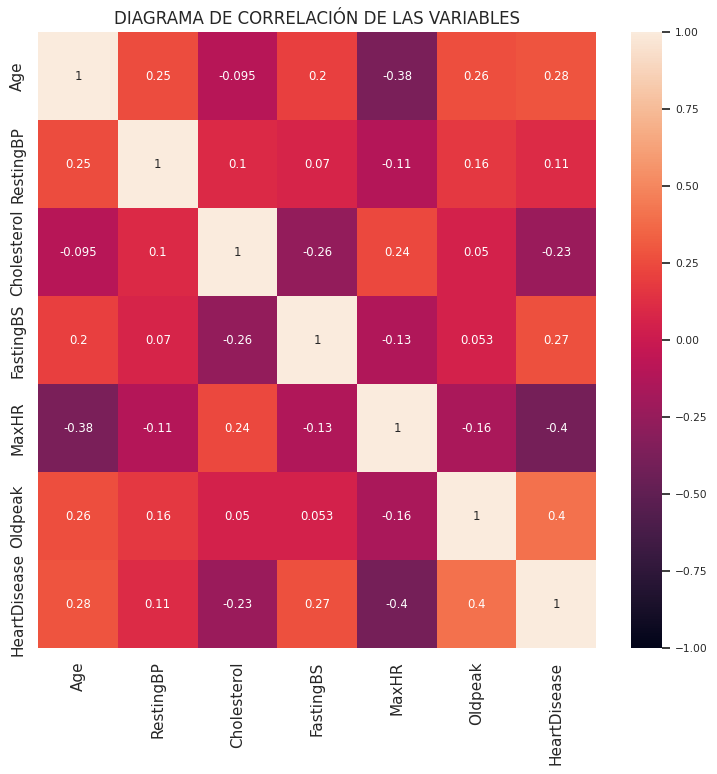

In [6]:
sns.set (rc = {'figure.figsize':(9, 8)})
plt.title('DIAGRAMA DE CORRELACIÓN DE LAS VARIABLES')
sns.set(font_scale=0.7)
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot=True)

Como se puede apreciar en el siguiente gráfico, el dataset muestra que los hombres tienden a tener más ataques al corazón que las mujeres. En la variable sexo, 1 representa al Masculino y 0 representa al Femenino. En el caso del output, 0 representa que no tiene ataques al corazón, y 1 representa todo lo contrario.

In [7]:
fig01=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribución de ataques del corazón por sexo del paciente",
                 barmode="group")
fig01.show()

En el siguiente gráfico se muestra que el tipo de dolor torácito es la angina típica, que es un tipo de dolor de pecho ocasionado por una disminución de la irrigación sanguínea al corazón; además está más presente en los hombres.

In [8]:
fig02=px.histogram(df, 
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribución de tipo de dolor torácito por sexo del paciente")
fig02.show()

La angina de pecho aparece típicamente durante el ejercicio o frente a tensiones psicológicas y se alivia con reposo. El gráfico muestra que la angina inducida por ejercicio no es muy común en el dataset presentado; sin embargo, en caso de tener angina por ejercicio, se presenta mayormente en los hombres.

In [9]:
fig03=px.histogram(df, 
                 x="ExerciseAngina",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribución angina inducida por ejercicio dependiendo del sexo del paciente")
fig03.show()

# **Pre-procesamiento de datos**

In [10]:
# Creando una copia del dataset
df1 = df.copy()

# Separar las columnas categoricas 
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
con_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# codificar las columnas categoricas
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# Definiendo las variables de la variable objetivo
X = df1.drop(['HeartDisease'],axis=1)
y = df1[['HeartDisease']]

# Escalando las variables
scaler = RobustScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.076923,0.5,0.704000,0.944444,-0.400000,1,1,0,0,0,1,0,0,0,1
1,-0.384615,1.5,-0.458667,0.500000,0.266667,0,0,1,0,0,1,0,0,1,0
2,-1.307692,0.0,0.640000,-1.111111,-0.400000,1,1,0,0,0,0,1,0,0,1
3,-0.461538,0.4,-0.096000,-0.833333,0.600000,0,0,0,0,0,1,0,1,1,0
4,0.000000,1.0,-0.298667,-0.444444,-0.400000,1,0,1,0,0,1,0,0,0,1


In [11]:
#Dividiendo el dataset para el entrenamiento y validación. Se tomó un 40% del total para el entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
X.shape

(918, 15)

#**Entrenamiento de modelos**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

model = Sequential()
model.add(Dense(15, input_dim=15, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 128       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')

In [15]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=200,batch_size=10)

Epoch 1/200
55/55 [==============================] - 2s 13ms/step - loss: 0.7855 - accuracy: 0.4782 - val_loss: 0.7715 - val_accuracy: 0.3995
Epoch 2/200
55/55 [==============================] - 0s 7ms/step - loss: 0.7007 - accuracy: 0.4782 - val_loss: 0.6954 - val_accuracy: 0.3995
Epoch 3/200
55/55 [==============================] - 0s 7ms/step - loss: 0.6641 - accuracy: 0.6709 - val_loss: 0.6568 - val_accuracy: 0.7663
Epoch 4/200
55/55 [==============================] - 0s 7ms/step - loss: 0.6373 - accuracy: 0.8036 - val_loss: 0.6257 - val_accuracy: 0.8125
Epoch 5/200
55/55 [==============================] - 0s 9ms/step - loss: 0.6112 - accuracy: 0.8255 - val_loss: 0.5994 - val_accuracy: 0.8261
Epoch 6/200
55/55 [==============================] - 0s 6ms/step - loss: 0.5843 - accuracy: 0.8145 - val_loss: 0.5715 - val_accuracy: 0.8370
Epoch 7/200
55/55 [==============================] - 0s 7ms/step - loss: 0.5565 - accuracy: 0.8327 - val_loss: 0.5458 - val_accuracy: 0.8451
Epoch 8/200


El siguiente gráfico muestra como el accuracy del modelo va creciendo a medida que hay más iteraciones. Se comparan

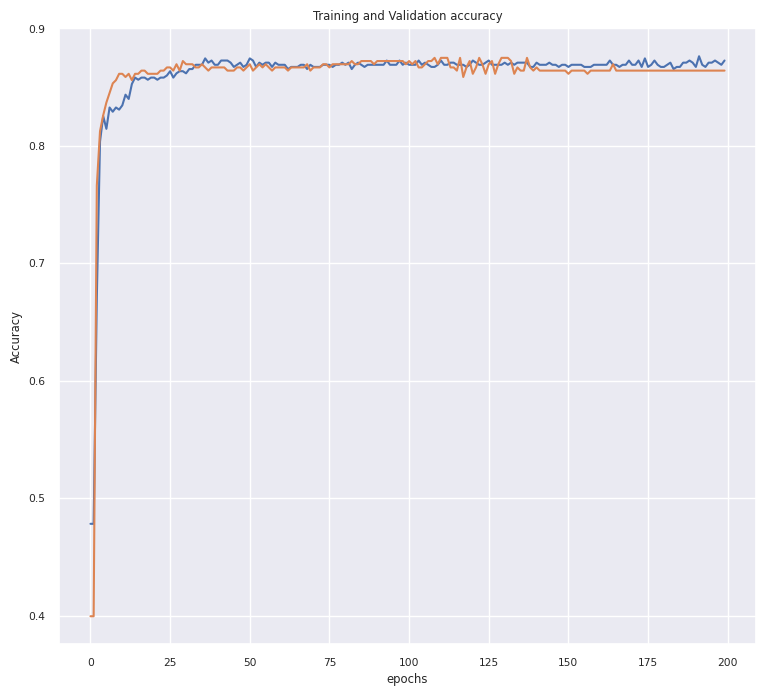

In [16]:
plt.plot(history.history['accuracy'], label='Training set')
plt.plot(history.history['val_accuracy'], label='validation set')
plt.title('Training and Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.show()

In [17]:
prediction = model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [18]:
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, confusion_matrix
m_accuracy = accuracy_score(y_test
              , prediction.round())


In [19]:
print('El accuracy del modelo es',m_accuracy.round(2))

El accuracy del modelo es 0.86
